# Evaluating the model using cross_validation

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, activation
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [49]:
x = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter03/data/HCV_feats.csv")
y = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter03/data/HCV_target.csv")

In [39]:
print(f"Number of features: {x.shape[1]}")
print(f"Number of examples: {x.shape[0]}")
print(f"Number of features: {np.unique(y)}")

Number of features: 28
Number of examples: 1385
Number of features: [0 1]


In [43]:
def build_model():
    model = Sequential()
    model.add(Dense(4,input_dim=x.shape[1],activation = 'tanh'))
    model.add(Dense(2,activation = 'tanh'))
    model.add(Dense(1,activation = 'sigmoid'))
    model.compile(loss="binary_crossentropy",metrics="accuracy",optimizer="adam")
    return model



In [41]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,1.102814,-0.979276,1.568525,0.969420,-1.005067,-0.992089,-1.005067,1.002168,0.997836,0.992089,...,-0.103412,-2.960181,-2.999471,-4.021808,0.181960,0.092882,-0.001962,-1.087692,-1.088823,0.805050
1,-0.036355,-0.979276,0.096039,-1.031544,0.994959,1.007974,-1.005067,1.002168,0.997836,-1.007974,...,1.118124,-0.989700,1.501857,1.493666,-1.555454,-0.171903,1.221053,0.185824,-0.972681,-1.432396
2,1.216730,-0.979276,1.077696,0.969420,0.994959,1.007974,0.994959,-0.997836,-1.002168,-1.007974,...,1.232643,-2.960181,-2.999471,-4.021808,-0.055972,0.166905,-1.012273,1.695069,0.999427,-1.432396
3,0.305396,1.021163,1.077696,-1.031544,0.994959,-0.992089,0.994959,-0.997836,0.997836,-1.007974,...,0.163799,-1.330745,-0.252898,-0.061981,1.274675,-0.416795,1.040971,1.727277,1.087139,0.059234
4,1.444564,-0.979276,0.832282,-1.031544,-1.005067,1.007974,-1.005067,1.002168,0.997836,0.992089,...,1.385335,0.412373,0.243011,-0.486248,0.196318,0.380636,12.069419,0.193923,-0.181303,0.307840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,-0.264188,-0.979276,0.096039,-1.031544,0.994959,1.007974,0.994959,-0.997836,-1.002168,-1.007974,...,1.652546,-0.762337,-1.511744,1.635088,-0.574200,-1.504642,-1.012273,-1.087692,-1.088823,1.302260
1381,0.988897,-0.979276,1.323110,-1.031544,0.994959,1.007974,-1.005067,-0.997836,-1.002168,-1.007974,...,0.927259,0.526054,-0.748807,1.069398,-0.309697,-1.236759,0.366648,-0.809510,-0.205921,0.059234
1382,-0.492022,-0.979276,-0.640203,0.969420,0.994959,-0.992089,-1.005067,-0.997836,0.997836,-1.007974,...,1.232643,0.147116,-1.702479,-1.334782,0.061369,-0.077694,1.813706,0.211971,-0.489235,-0.935186
1383,0.647146,-0.979276,0.096039,0.969420,-1.005067,-0.992089,0.994959,1.002168,0.997836,-1.007974,...,-1.401293,-1.330745,-0.100311,1.352243,-1.274928,-1.448806,0.795717,-1.078409,1.512293,1.302260


In [44]:
np.random.seed(1)

classifier = KerasClassifier(build_fn=build_model,epochs = 100, batch_size=20,shuffle=False)
cv = StratifiedKFold(n_splits=5,shuffle=False)
cv_score= cross_val_score(classifier,x,y,cv=cv)



Epoch 1/100


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\3153056266.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=build_model,epochs = 100, batch_size=20,shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 0.7391 - accuracy: 0.4711
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.4738
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 0.7150 - accuracy: 0.4810
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 0.7082 - accuracy: 0.4838
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4982
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.5063
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5171
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5235
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5271
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5298
Epoch 11/100
56/56 [=

56/56 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.6327
Epoch 65/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.6336
Epoch 66/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.6327
Epoch 67/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.6345
Epoch 68/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6354
Epoch 69/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.6381
Epoch 70/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.6363
Epoch 71/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6455 - accuracy: 0.6363
Epoch 72/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.6390
Epoch 73/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6444 - accuracy: 0.6417
Epoch 74/100


56/56 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6173
Epoch 27/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.6182
Epoch 28/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.6182
Epoch 29/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6182
Epoch 30/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.6182
Epoch 31/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.6155
Epoch 32/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6173
Epoch 33/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.6182
Epoch 34/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6209
Epoch 35/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.6209
Epoch 36/100


56/56 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.6336
Epoch 90/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6345
Epoch 91/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.6336
Epoch 92/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6336
Epoch 93/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.6300
Epoch 94/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.6291
Epoch 95/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.6291
Epoch 96/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6292 - accuracy: 0.6300
Epoch 97/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.6327
Epoch 98/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.6336
Epoch 99/100


In [47]:
for f in range(5):
    print("Test accuracy af folder", f+1, "=", cv_score[f])
print("\n")
print("final cross validation result", cv_score.mean())
print("standard deviation result", cv_score.std())

Test accuracy af folder 1 = 0.505415141582489
Test accuracy af folder 2 = 0.5018050670623779
Test accuracy af folder 3 = 0.49819493293762207
Test accuracy af folder 4 = 0.4837545156478882
Test accuracy af folder 5 = 0.5595667958259583


final cross validation result 0.5097472906112671
standard deviation result 0.025972719719203046


# Improve the classifier

In [52]:
def Build_model_1():
    model =Sequential()
    model.add(Dense(4,input_dim=x.shape[1],activation = 'relu'))
    model.add(Dense(4,activation = 'relu'))
    model.add(Dense(4,activation = 'relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = 'adam',metrics="accuracy")
    return model
    
def Build_model_2():
    model =Sequential()
    model.add(Dense(4,input_dim=x.shape[1],activation = 'relu'))
    model.add(Dense(2,activation = 'relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = 'adam',metrics="accuracy")
    return model
    
def Build_model_3():
    model =Sequential()
    model.add(Dense(8,input_dim=x.shape[1],activation = 'relu'))
    model.add(Dense(8,activation = 'relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = 'adam',metrics="accuracy")
    return model


In [53]:
models = [Build_model_1,Build_model_2,Build_model_3]
results=[]
np.random.seed(42)

for m in range(len(models)):
    my_model = KerasClassifier(build_fn=models[m],epochs=100,batch_size=20,shuffle=False)
    cv=KFold(n_splits=5)
    result = cross_val_score(my_model,x,y,cv=cv)
    results.append(result)

C:\Users\97155\AppData\Local\Temp\ipykernel_43240\3150269784.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=models[m],epochs=100,batch_size=20,shuffle=False)


Epoch 1/100
56/56 [==============================] - 1s 1ms/step - loss: 27529.1504 - accuracy: 0.4838
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 4302.6919 - accuracy: 0.5090
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 1237.9429 - accuracy: 0.5253
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 302.8581 - accuracy: 0.4847
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 55.1413 - accuracy: 0.5045
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 10.6765 - accuracy: 0.5072
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 5.8284 - accuracy: 0.4982
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 3.9979 - accuracy: 0.4946
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 3.0773 - accuracy: 0.5208
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 3.2758 - accuracy: 0.

56/56 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 64/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 65/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 66/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 67/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 68/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 69/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 70/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 71/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 72/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 73/100


56/56 [==============================] - 0s 2ms/step - loss: 447.4223 - accuracy: 0.5190
Epoch 24/100
56/56 [==============================] - 0s 1ms/step - loss: 308.3091 - accuracy: 0.5072
Epoch 25/100
56/56 [==============================] - 0s 2ms/step - loss: 253.1260 - accuracy: 0.5081
Epoch 26/100
56/56 [==============================] - 0s 2ms/step - loss: 554.9654 - accuracy: 0.5027
Epoch 27/100
56/56 [==============================] - 0s 2ms/step - loss: 415.1345 - accuracy: 0.5117
Epoch 28/100
56/56 [==============================] - 0s 2ms/step - loss: 507.4595 - accuracy: 0.4747
Epoch 29/100
56/56 [==============================] - 0s 2ms/step - loss: 470.0757 - accuracy: 0.5298
Epoch 30/100
56/56 [==============================] - 0s 2ms/step - loss: 326.9131 - accuracy: 0.5171
Epoch 31/100
56/56 [==============================] - 0s 2ms/step - loss: 526.1757 - accuracy: 0.4657
Epoch 32/100
56/56 [==============================] - 0s 2ms/step - loss: 589.8549 - accuracy: 

56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 85/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 86/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 87/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 88/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 89/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 90/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 91/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 92/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 93/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5099
Epoch 94/100


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\3150269784.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=models[m],epochs=100,batch_size=20,shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 100448.2500 - accuracy: 0.5027
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 46916.8828 - accuracy: 0.4982
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 949.8851 - accuracy: 0.4865
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 85.2470 - accuracy: 0.4865
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 20.6816 - accuracy: 0.4856
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 2.2868 - accuracy: 0.4856
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.4865
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.4865
Epoch 9/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4964
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5162
Epoch 11

56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 84/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 85/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 86/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 87/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 88/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 89/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 90/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 91/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 92/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5162
Epoch 93/100


Epoch 44/100
56/56 [==============================] - 0s 1ms/step - loss: 2.2641 - accuracy: 0.5361
Epoch 45/100
56/56 [==============================] - 0s 1ms/step - loss: 1.7879 - accuracy: 0.4910
Epoch 46/100
56/56 [==============================] - 0s 1ms/step - loss: 1.3537 - accuracy: 0.5162
Epoch 47/100
56/56 [==============================] - 0s 1ms/step - loss: 2.4654 - accuracy: 0.5108
Epoch 48/100
56/56 [==============================] - 0s 1ms/step - loss: 2.3290 - accuracy: 0.5108
Epoch 49/100
56/56 [==============================] - 0s 1ms/step - loss: 1.8798 - accuracy: 0.5244
Epoch 50/100
56/56 [==============================] - 0s 1ms/step - loss: 1.4690 - accuracy: 0.5361
Epoch 51/100
56/56 [==============================] - 0s 1ms/step - loss: 1.6673 - accuracy: 0.5153
Epoch 52/100
56/56 [==============================] - 0s 1ms/step - loss: 1.7057 - accuracy: 0.5018
Epoch 53/100
56/56 [==============================] - 0s 1ms/step - loss: 2.2411 - accuracy: 0.5262


56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 26/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 27/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 28/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 29/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 30/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 31/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 32/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 33/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 34/100
56/56 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 35/100


56/56 [==============================] - 0s 2ms/step - loss: 3784.9714 - accuracy: 0.5090
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 1871.3883 - accuracy: 0.4982
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 946.0900 - accuracy: 0.4928
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 534.1276 - accuracy: 0.4874
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 315.2565 - accuracy: 0.4901
Epoch 11/100
56/56 [==============================] - 0s 1ms/step - loss: 210.8483 - accuracy: 0.4991
Epoch 12/100
56/56 [==============================] - 0s 1ms/step - loss: 117.9856 - accuracy: 0.4991
Epoch 13/100
56/56 [==============================] - 0s 1ms/step - loss: 93.9248 - accuracy: 0.4964
Epoch 14/100
56/56 [==============================] - 0s 1ms/step - loss: 75.0781 - accuracy: 0.4928
Epoch 15/100
56/56 [==============================] - 0s 1ms/step - loss: 65.4437 - accuracy: 0.49

C:\Users\97155\AppData\Local\Temp\ipykernel_43240\3150269784.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=models[m],epochs=100,batch_size=20,shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 248937.9375 - accuracy: 0.5045
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 38377.4219 - accuracy: 0.5036
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 30668.2344 - accuracy: 0.4937
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 23221.5391 - accuracy: 0.5090
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 16358.3379 - accuracy: 0.5063
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 10254.1240 - accuracy: 0.4955
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 5039.7700 - accuracy: 0.5090
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 2416.2136 - accuracy: 0.4901
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 2193.9509 - accuracy: 0.4982
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 1950.5970 - a

56/56 [==============================] - 0s 2ms/step - loss: 630.2901 - accuracy: 0.4982
Epoch 82/100
56/56 [==============================] - 0s 1ms/step - loss: 648.2441 - accuracy: 0.5135
Epoch 83/100
56/56 [==============================] - 0s 2ms/step - loss: 724.8913 - accuracy: 0.4883
Epoch 84/100
56/56 [==============================] - 0s 1ms/step - loss: 536.6760 - accuracy: 0.5271
Epoch 85/100
56/56 [==============================] - 0s 1ms/step - loss: 497.6903 - accuracy: 0.5171
Epoch 86/100
56/56 [==============================] - 0s 1ms/step - loss: 519.1583 - accuracy: 0.5415
Epoch 87/100
56/56 [==============================] - 0s 1ms/step - loss: 547.8420 - accuracy: 0.5199
Epoch 88/100
56/56 [==============================] - 0s 1ms/step - loss: 802.2555 - accuracy: 0.5181
Epoch 89/100
56/56 [==============================] - 0s 1ms/step - loss: 614.7144 - accuracy: 0.4946
Epoch 90/100
56/56 [==============================] - 0s 1ms/step - loss: 886.7759 - accuracy: 

56/56 [==============================] - 0s 1ms/step - loss: 598.1561 - accuracy: 0.5117
Epoch 40/100
56/56 [==============================] - 0s 1ms/step - loss: 465.3112 - accuracy: 0.5253
Epoch 41/100
56/56 [==============================] - 0s 1ms/step - loss: 586.4371 - accuracy: 0.5190
Epoch 42/100
56/56 [==============================] - 0s 1ms/step - loss: 430.2154 - accuracy: 0.5397
Epoch 43/100
56/56 [==============================] - 0s 1ms/step - loss: 455.0663 - accuracy: 0.5343
Epoch 44/100
56/56 [==============================] - 0s 1ms/step - loss: 317.4095 - accuracy: 0.5217
Epoch 45/100
56/56 [==============================] - 0s 1ms/step - loss: 378.5064 - accuracy: 0.5361
Epoch 46/100
56/56 [==============================] - 0s 1ms/step - loss: 581.1224 - accuracy: 0.5108
Epoch 47/100
56/56 [==============================] - 0s 1ms/step - loss: 450.3562 - accuracy: 0.5415
Epoch 48/100
56/56 [==============================] - 0s 2ms/step - loss: 153.2204 - accuracy: 

56/56 [==============================] - 0s 1ms/step - loss: 579.4951 - accuracy: 0.5415
Epoch 99/100
56/56 [==============================] - 0s 1ms/step - loss: 685.6346 - accuracy: 0.5253
Epoch 100/100
14/14 [==============================] - 0s 1ms/step - loss: 335.9004 - accuracy: 0.4838
Epoch 1/100
56/56 [==============================] - 1s 2ms/step - loss: 16090.5059 - accuracy: 0.5018
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 3570.4058 - accuracy: 0.5181
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 1480.5321 - accuracy: 0.5226
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 548.5630 - accuracy: 0.5045
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 431.2546 - accuracy: 0.4847
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 469.6901 - accuracy: 0.5072
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 322.3152 - accuracy: 0.

In [64]:


for s in range(len(results)):
    print("Total mean accuracy:", abs(results[s].mean()))
   

Total mean loss: 0.5061371743679046
Total mean loss: 0.5075812220573426
Total mean loss: 0.48808664083480835


In [56]:

epochs=[100,200]
batches=[10,20]
results_1=[]
for e in range(len(epochs)):
    for b in range(len(batches)):
        my_model = KerasClassifier(build_fn=Build_model_1,epochs=epochs[e],batch_size=batches[b],shuffle=False)
        cv=KFold(n_splits=5)
        result = cross_val_score(my_model,x,y,cv=cv)
        results_1.append(result)
        

Epoch 1/100


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\3672720790.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=epochs[e],batch_size=batches[b],shuffle=False)


111/111 [==============================] - 1s 1ms/step - loss: 9954.9219 - accuracy: 0.4955
Epoch 2/100
111/111 [==============================] - 0s 1ms/step - loss: 1.0442 - accuracy: 0.5153
Epoch 3/100
111/111 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5153
Epoch 4/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5153
Epoch 5/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5153
Epoch 6/100
111/111 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5153
Epoch 7/100
111/111 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5153
Epoch 8/100
111/111 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5153
Epoch 9/100
111/111 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5153
Epoch 10/100
111/111 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.515

111/111 [==============================] - 0s 1ms/step - loss: 1.1206 - accuracy: 0.5009
Epoch 60/100
111/111 [==============================] - 0s 1ms/step - loss: 1.1572 - accuracy: 0.4937
Epoch 61/100
111/111 [==============================] - 0s 1ms/step - loss: 1.1693 - accuracy: 0.4883
Epoch 62/100
111/111 [==============================] - 0s 1ms/step - loss: 0.9378 - accuracy: 0.5208
Epoch 63/100
111/111 [==============================] - 0s 1ms/step - loss: 0.8070 - accuracy: 0.5135
Epoch 64/100
111/111 [==============================] - 0s 1ms/step - loss: 0.8382 - accuracy: 0.5298
Epoch 65/100
111/111 [==============================] - 0s 1ms/step - loss: 0.8066 - accuracy: 0.5235
Epoch 66/100
111/111 [==============================] - 0s 1ms/step - loss: 0.7884 - accuracy: 0.5208
Epoch 67/100
111/111 [==============================] - 0s 1ms/step - loss: 0.7849 - accuracy: 0.5226
Epoch 68/100
111/111 [==============================] - 0s 1ms/step - loss: 0.7758 - accuracy: 

111/111 [==============================] - 0s 2ms/step - loss: 2.4835 - accuracy: 0.5253
Epoch 18/100
111/111 [==============================] - 0s 2ms/step - loss: 3.5926 - accuracy: 0.5244
Epoch 19/100
111/111 [==============================] - 0s 2ms/step - loss: 4.3851 - accuracy: 0.5289
Epoch 20/100
111/111 [==============================] - 0s 2ms/step - loss: 4.8620 - accuracy: 0.5244
Epoch 21/100
111/111 [==============================] - 0s 2ms/step - loss: 7.8212 - accuracy: 0.5244
Epoch 22/100
111/111 [==============================] - 0s 2ms/step - loss: 4.3560 - accuracy: 0.5217
Epoch 23/100
111/111 [==============================] - 0s 2ms/step - loss: 4.3064 - accuracy: 0.5226
Epoch 24/100
111/111 [==============================] - 0s 2ms/step - loss: 3.8902 - accuracy: 0.5217
Epoch 25/100
111/111 [==============================] - 0s 2ms/step - loss: 1.0898 - accuracy: 0.5217
Epoch 26/100
111/111 [==============================] - 0s 2ms/step - loss: 1.8582 - accuracy: 

111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 77/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 78/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 79/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 80/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 81/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 82/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 83/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 84/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 85/100
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 

C:\Users\97155\AppData\Local\Temp\ipykernel_43240\3672720790.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=epochs[e],batch_size=batches[b],shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 129877.5703 - accuracy: 0.4847
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 63005.6758 - accuracy: 0.4847
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 25253.5547 - accuracy: 0.4847
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 2733.5574 - accuracy: 0.4847
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 130.4909 - accuracy: 0.5181
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 80.0687 - accuracy: 0.4910
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 85.9872 - accuracy: 0.4847
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 95.0822 - accuracy: 0.5199
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 98.5294 - accuracy: 0.4928
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 87.5433 - accuracy: 0.459

56/56 [==============================] - 0s 1ms/step - loss: 108.1047 - accuracy: 0.5162
Epoch 62/100
56/56 [==============================] - 0s 1ms/step - loss: 132.6005 - accuracy: 0.4648
Epoch 63/100
56/56 [==============================] - 0s 1ms/step - loss: 131.9885 - accuracy: 0.5072
Epoch 64/100
56/56 [==============================] - 0s 1ms/step - loss: 104.8256 - accuracy: 0.5199
Epoch 65/100
56/56 [==============================] - 0s 1ms/step - loss: 119.0794 - accuracy: 0.5045
Epoch 66/100
56/56 [==============================] - 0s 1ms/step - loss: 209.9937 - accuracy: 0.4874
Epoch 67/100
56/56 [==============================] - 0s 1ms/step - loss: 143.0916 - accuracy: 0.4783
Epoch 68/100
56/56 [==============================] - 0s 1ms/step - loss: 169.8676 - accuracy: 0.5235
Epoch 69/100
56/56 [==============================] - 0s 1ms/step - loss: 75.4541 - accuracy: 0.5388
Epoch 70/100
56/56 [==============================] - 0s 1ms/step - loss: 109.1759 - accuracy: 0

56/56 [==============================] - 0s 1ms/step - loss: 6.4537 - accuracy: 0.5072
Epoch 23/100
56/56 [==============================] - 0s 1ms/step - loss: 8.8445 - accuracy: 0.5018
Epoch 24/100
56/56 [==============================] - 0s 1ms/step - loss: 7.7658 - accuracy: 0.5307
Epoch 25/100
56/56 [==============================] - 0s 1ms/step - loss: 8.4411 - accuracy: 0.4819
Epoch 26/100
56/56 [==============================] - 0s 1ms/step - loss: 2.8953 - accuracy: 0.5271
Epoch 27/100
56/56 [==============================] - 0s 1ms/step - loss: 3.2220 - accuracy: 0.5415
Epoch 28/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0009 - accuracy: 0.5018
Epoch 29/100
56/56 [==============================] - 0s 1ms/step - loss: 11.7169 - accuracy: 0.4892
Epoch 30/100
56/56 [==============================] - 0s 1ms/step - loss: 6.4752 - accuracy: 0.5379
Epoch 31/100
56/56 [==============================] - 0s 1ms/step - loss: 9.0581 - accuracy: 0.5262
Epoch 32/100

56/56 [==============================] - 0s 1ms/step - loss: 1308.7023 - accuracy: 0.4747
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 208.1831 - accuracy: 0.4792
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 76.5588 - accuracy: 0.5099
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 115.3058 - accuracy: 0.5000
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 109.8239 - accuracy: 0.5000
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 52.8440 - accuracy: 0.5018
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 119.0319 - accuracy: 0.4756
Epoch 10/100
56/56 [==============================] - 0s 2ms/step - loss: 102.3444 - accuracy: 0.4856
Epoch 11/100
56/56 [==============================] - 0s 2ms/step - loss: 100.2098 - accuracy: 0.5153
Epoch 12/100
56/56 [==============================] - 0s 2ms/step - loss: 102.4606 - accuracy: 0.4919


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\3672720790.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=epochs[e],batch_size=batches[b],shuffle=False)


111/111 [==============================] - 2s 1ms/step - loss: 3024.1367 - accuracy: 0.5099
Epoch 2/200
111/111 [==============================] - 0s 1ms/step - loss: 404.8912 - accuracy: 0.5126
Epoch 3/200
111/111 [==============================] - 0s 1ms/step - loss: 380.4666 - accuracy: 0.5298
Epoch 4/200
111/111 [==============================] - 0s 1ms/step - loss: 470.5085 - accuracy: 0.5244
Epoch 5/200
111/111 [==============================] - 0s 1ms/step - loss: 230.5753 - accuracy: 0.5081
Epoch 6/200
111/111 [==============================] - 0s 1ms/step - loss: 625.0293 - accuracy: 0.5325
Epoch 7/200
111/111 [==============================] - 0s 1ms/step - loss: 337.1161 - accuracy: 0.4973
Epoch 8/200
111/111 [==============================] - 0s 1ms/step - loss: 466.0460 - accuracy: 0.5036
Epoch 9/200
111/111 [==============================] - 0s 1ms/step - loss: 266.0442 - accuracy: 0.5226
Epoch 10/200
111/111 [==============================] - 0s 1ms/step - loss: 344.6449

Epoch 81/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.5135
Epoch 82/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5135
Epoch 83/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.5135
Epoch 84/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5144
Epoch 85/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5144
Epoch 86/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5144
Epoch 87/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5144
Epoch 88/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5144
Epoch 89/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5144
Epoch 90/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6937

111/111 [==============================] - 0s 2ms/step - loss: 9.8632 - accuracy: 0.4955
Epoch 39/200
111/111 [==============================] - 0s 2ms/step - loss: 4.7586 - accuracy: 0.5099
Epoch 40/200
111/111 [==============================] - 0s 2ms/step - loss: 4.2835 - accuracy: 0.4973
Epoch 41/200
111/111 [==============================] - 0s 2ms/step - loss: 4.7058 - accuracy: 0.4874
Epoch 42/200
111/111 [==============================] - 0s 1ms/step - loss: 2.3082 - accuracy: 0.4801
Epoch 43/200
111/111 [==============================] - 0s 2ms/step - loss: 3.1312 - accuracy: 0.4991
Epoch 44/200
111/111 [==============================] - 0s 2ms/step - loss: 2.1923 - accuracy: 0.4774
Epoch 45/200
111/111 [==============================] - 0s 2ms/step - loss: 1.5677 - accuracy: 0.5027
Epoch 46/200
111/111 [==============================] - 0s 1ms/step - loss: 1.7489 - accuracy: 0.5181
Epoch 47/200
111/111 [==============================] - 0s 2ms/step - loss: 1.8227 - accuracy: 

111/111 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5108
Epoch 198/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5108
Epoch 199/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5108
Epoch 200/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5487
Epoch 1/200
111/111 [==============================] - 1s 1ms/step - loss: 174753.5000 - accuracy: 0.4738
Epoch 2/200
111/111 [==============================] - 0s 1ms/step - loss: 20961.6875 - accuracy: 0.4991
Epoch 3/200
111/111 [==============================] - 0s 1ms/step - loss: 12212.2080 - accuracy: 0.5171
Epoch 4/200
111/111 [==============================] - 0s 1ms/step - loss: 7322.0122 - accuracy: 0.5370
Epoch 5/200
111/111 [==============================] - 0s 1ms/step - loss: 4538.5742 - accuracy: 0.5370
Epoch 6/200
111/111 [==============================] - 0s 1ms/step - loss: 3111.

111/111 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 155/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 156/200
111/111 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 157/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 158/200
111/111 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 159/200
111/111 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 160/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 161/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 162/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 163/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6915 - a

111/111 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 114/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 115/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 116/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 117/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 118/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 119/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 120/200
111/111 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 121/200
111/111 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 122/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6923 - a

111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 72/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 73/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 74/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 75/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 76/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 77/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 78/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 79/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 80/200
111/111 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 

C:\Users\97155\AppData\Local\Temp\ipykernel_43240\3672720790.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=epochs[e],batch_size=batches[b],shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 43509.5469 - accuracy: 0.4865
Epoch 2/200
56/56 [==============================] - 0s 1ms/step - loss: 5752.4282 - accuracy: 0.4910
Epoch 3/200
56/56 [==============================] - 0s 1ms/step - loss: 813.0641 - accuracy: 0.5162
Epoch 4/200
56/56 [==============================] - 0s 1ms/step - loss: 237.8471 - accuracy: 0.5153
Epoch 5/200
56/56 [==============================] - 0s 1ms/step - loss: 96.7225 - accuracy: 0.5162
Epoch 6/200
56/56 [==============================] - 0s 1ms/step - loss: 55.0058 - accuracy: 0.5190
Epoch 7/200
56/56 [==============================] - 0s 1ms/step - loss: 38.8669 - accuracy: 0.5208
Epoch 8/200
56/56 [==============================] - 0s 1ms/step - loss: 31.7348 - accuracy: 0.5217
Epoch 9/200
56/56 [==============================] - 0s 1ms/step - loss: 26.1829 - accuracy: 0.5190
Epoch 10/200
56/56 [==============================] - 0s 1ms/step - loss: 20.2485 - accuracy: 0.5190
Epoc

56/56 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 164/200
56/56 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 165/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 166/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 167/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 168/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 169/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 170/200
56/56 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 171/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 172/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5162
Epoc

Epoch 43/200
56/56 [==============================] - 0s 1ms/step - loss: 359.0516 - accuracy: 0.4919
Epoch 44/200
56/56 [==============================] - 0s 1ms/step - loss: 497.8479 - accuracy: 0.4783
Epoch 45/200
56/56 [==============================] - 0s 1ms/step - loss: 573.9412 - accuracy: 0.5370
Epoch 46/200
56/56 [==============================] - 0s 1ms/step - loss: 350.5794 - accuracy: 0.5126
Epoch 47/200
56/56 [==============================] - 0s 1ms/step - loss: 467.4441 - accuracy: 0.5108
Epoch 48/200
56/56 [==============================] - 0s 2ms/step - loss: 241.9898 - accuracy: 0.5190
Epoch 49/200
56/56 [==============================] - 0s 2ms/step - loss: 284.6375 - accuracy: 0.5199
Epoch 50/200
56/56 [==============================] - 0s 2ms/step - loss: 250.1051 - accuracy: 0.5036
Epoch 51/200
56/56 [==============================] - 0s 2ms/step - loss: 387.3763 - accuracy: 0.4964
Epoch 52/200
56/56 [==============================] - 0s 2ms/step - loss: 211.7670

56/56 [==============================] - 0s 1ms/step - loss: 179.2001 - accuracy: 0.5117
Epoch 124/200
56/56 [==============================] - 0s 1ms/step - loss: 208.7213 - accuracy: 0.4901
Epoch 125/200
56/56 [==============================] - 0s 1ms/step - loss: 151.1704 - accuracy: 0.5108
Epoch 126/200
56/56 [==============================] - 0s 1ms/step - loss: 160.6288 - accuracy: 0.5253
Epoch 127/200
56/56 [==============================] - 0s 1ms/step - loss: 123.8944 - accuracy: 0.5171
Epoch 128/200
56/56 [==============================] - 0s 1ms/step - loss: 165.8262 - accuracy: 0.4937
Epoch 129/200
56/56 [==============================] - 0s 1ms/step - loss: 84.2724 - accuracy: 0.5208
Epoch 130/200
56/56 [==============================] - 0s 1ms/step - loss: 139.0087 - accuracy: 0.5217
Epoch 131/200
56/56 [==============================] - 0s 1ms/step - loss: 154.9698 - accuracy: 0.5099
Epoch 132/200
56/56 [==============================] - 0s 1ms/step - loss: 170.4778 - ac

Epoch 2/200
56/56 [==============================] - 0s 1ms/step - loss: 10680.7021 - accuracy: 0.4856
Epoch 3/200
56/56 [==============================] - 0s 1ms/step - loss: 487.5884 - accuracy: 0.5217
Epoch 4/200
56/56 [==============================] - 0s 1ms/step - loss: 101.9219 - accuracy: 0.5325
Epoch 5/200
56/56 [==============================] - 0s 1ms/step - loss: 32.5222 - accuracy: 0.5352
Epoch 6/200
56/56 [==============================] - 0s 1ms/step - loss: 18.4916 - accuracy: 0.5361
Epoch 7/200
56/56 [==============================] - 0s 1ms/step - loss: 11.9323 - accuracy: 0.5352
Epoch 8/200
56/56 [==============================] - 0s 1ms/step - loss: 5.6340 - accuracy: 0.5352
Epoch 9/200
56/56 [==============================] - 0s 1ms/step - loss: 1.4540 - accuracy: 0.5361
Epoch 10/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 11/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.53

56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 165/200
56/56 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 166/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 167/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 168/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 169/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 170/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 171/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 172/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoch 173/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5370
Epoc

56/56 [==============================] - 0s 1ms/step - loss: 0.7296 - accuracy: 0.5253
Epoch 126/200
56/56 [==============================] - 0s 1ms/step - loss: 0.7208 - accuracy: 0.5253
Epoch 127/200
56/56 [==============================] - 0s 1ms/step - loss: 0.7102 - accuracy: 0.5253
Epoch 128/200
56/56 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.5253
Epoch 129/200
56/56 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.5253
Epoch 130/200
56/56 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.5262
Epoch 131/200
56/56 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.5271
Epoch 132/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.5262
Epoch 133/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.5253
Epoch 134/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.5253
Epoc

56/56 [==============================] - 0s 1ms/step - loss: 1.1350 - accuracy: 0.5253
Epoch 87/200
56/56 [==============================] - 0s 1ms/step - loss: 2.7285 - accuracy: 0.5072
Epoch 88/200
56/56 [==============================] - 0s 1ms/step - loss: 1.5106 - accuracy: 0.5208
Epoch 89/200
56/56 [==============================] - 0s 2ms/step - loss: 2.0459 - accuracy: 0.5325
Epoch 90/200
56/56 [==============================] - 0s 2ms/step - loss: 1.9137 - accuracy: 0.4955
Epoch 91/200
56/56 [==============================] - 0s 1ms/step - loss: 3.1478 - accuracy: 0.5081
Epoch 92/200
56/56 [==============================] - 0s 1ms/step - loss: 1.5845 - accuracy: 0.4955
Epoch 93/200
56/56 [==============================] - 0s 1ms/step - loss: 1.3893 - accuracy: 0.4937
Epoch 94/200
56/56 [==============================] - 0s 1ms/step - loss: 1.5478 - accuracy: 0.4955
Epoch 95/200
56/56 [==============================] - 0s 1ms/step - loss: 2.2847 - accuracy: 0.4747
Epoch 96/200


In [67]:
r=0
for e in range(len(epochs)):
    for b in range(len(batches)):
        print("epochs:", epochs[e], "Batches:", batches[b], "Total accuracy function:", abs(results_1[r].mean()))
        r+=1

epochs: 100 Batches: 10 Total accuracy function: 0.5176895320415497
epochs: 100 Batches: 20 Total accuracy function: 0.5003610074520111
epochs: 200 Batches: 10 Total accuracy function: 0.5176895320415497
epochs: 200 Batches: 20 Total accuracy function: 0.4960288882255554


In [60]:
def Build_model_1(activation='relu',optimizer= 'adam'):
    model =Sequential()
    model.add(Dense(4,input_dim=x.shape[1],activation = activation))
    model.add(Dense(4,activation = activation))
    model.add(Dense(4,activation = activation))
    model.add(Dense(1,activation=activation))
    model.compile(loss="binary_crossentropy",optimizer = optimizer,metrics="accuracy")
    return model

optimizers = ['rmsprop','adam','sgd']
activations= ['relu','tanh']
results_2=[]

for o in range(len(optimizers)):
    for a in range(len(activations)):
        optimizer = optimizers[o]
        activation = activations[a]
        my_model = KerasClassifier(build_fn=Build_model_1,epochs=100,batch_size=20,shuffle=False)
        cv= KFold(n_splits=5)
        result= cross_val_score(my_model,x,y,cv=cv)
        results_2.append(result)
        

Epoch 1/100


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\2789013824.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=100,batch_size=20,shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 11/100
56/56 [=

56/56 [==============================] - 0s 1ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 65/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 66/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 67/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 68/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 69/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 70/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 71/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 72/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 73/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8923 - accuracy: 0.4838
Epoch 74/100


56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 27/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 28/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 29/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 30/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 31/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 32/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 33/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 34/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 35/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 36/100


56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 90/100
56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 91/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 92/100
56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 93/100
56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 94/100
56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 95/100
56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 96/100
56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 97/100
56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 98/100
56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 99/100


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\2789013824.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=100,batch_size=20,shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3769 - accuracy: 0.5162
Epoch 11/100
56/56 [=

56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 65/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 66/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 67/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 68/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 69/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 70/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 71/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 72/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 73/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 74/100


56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 27/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 28/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 29/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 30/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 31/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 32/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 33/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 34/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 35/100
56/56 [==============================] - 0s 1ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 36/100


56/56 [==============================] - 0s 2ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 90/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 91/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 92/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 93/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 94/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 95/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 96/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 97/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 98/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9056 - accuracy: 0.4874
Epoch 99/100


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\2789013824.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=100,batch_size=20,shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 7.3907 - accuracy: 0.5153
Epoch 11/100
56/56 [=

56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 65/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 66/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 67/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 68/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 69/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 70/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 71/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 72/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 73/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 74/100


56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 27/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 28/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 29/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 30/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 31/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 32/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 33/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 34/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 35/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8719 - accuracy: 0.4892
Epoch 36/100


56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 90/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 91/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 92/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 93/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 94/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 95/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 96/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 97/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 98/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 99/100


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\2789013824.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=100,batch_size=20,shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9211 - accuracy: 0.4856
Epoch 11/100
56/56 [=

56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 65/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 66/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 67/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 68/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 69/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 70/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 71/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 72/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 73/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 74/100


56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 27/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 28/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 29/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 30/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 31/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 32/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 33/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 34/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 35/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0466 - accuracy: 0.4783
Epoch 36/100


56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 90/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 91/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 92/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 93/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 94/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 95/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 96/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 97/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 98/100
56/56 [==============================] - 0s 2ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 99/100


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\2789013824.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=100,batch_size=20,shuffle=False)


56/56 [==============================] - 1s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 8/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 9/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 10/100
56/56 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.4847
Epoch 11/100
56/56 [=

56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 65/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 66/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 67/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 68/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 69/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 70/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 71/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 72/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 73/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 74/100


56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 27/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 28/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 29/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 30/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 31/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 32/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 33/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 34/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 35/100
56/56 [==============================] - 0s 2ms/step - loss: 8.0603 - accuracy: 0.4774
Epoch 36/100


56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 90/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 91/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 92/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 93/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 94/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 95/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 96/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 97/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 98/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 99/100


C:\Users\97155\AppData\Local\Temp\ipykernel_43240\2789013824.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(build_fn=Build_model_1,epochs=100,batch_size=20,shuffle=False)


56/56 [==============================] - 1s 1ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 8/100
56/56 [==============================] - 0s 2ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 10/100
56/56 [==============================] - 0s 2ms/step - loss: 7.5608 - accuracy: 0.5063
Epoch 11/100
56/56 [=

56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 65/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 66/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 67/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 68/100
56/56 [==============================] - 0s 1ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 69/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 70/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 71/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 72/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 73/100
56/56 [==============================] - 0s 2ms/step - loss: 7.4732 - accuracy: 0.5099
Epoch 74/100


56/56 [==============================] - 0s 1ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 27/100
56/56 [==============================] - 0s 1ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 28/100
56/56 [==============================] - 0s 1ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 29/100
56/56 [==============================] - 0s 1ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 30/100
56/56 [==============================] - 0s 1ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 31/100
56/56 [==============================] - 0s 1ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 32/100
56/56 [==============================] - 0s 1ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 33/100
56/56 [==============================] - 0s 1ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 34/100
56/56 [==============================] - 0s 2ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 35/100
56/56 [==============================] - 0s 1ms/step - loss: 7.2943 - accuracy: 0.5217
Epoch 36/100


56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 90/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 91/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 92/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 93/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 94/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 95/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 96/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 97/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 98/100
56/56 [==============================] - 0s 1ms/step - loss: 7.8656 - accuracy: 0.4901
Epoch 99/100


In [66]:
w=0
for o in range(len(optimizers)):
    for a in range(len(activations)):
        print("optimizer:", optimizers[o],"activations:", activations[a],"Total accuracy:", abs(results_2[w].mean()))
        w+=1

optimizer: rmsprop activations: relu Total accuracy: 0.516967499256134
optimizer: rmsprop activations: tanh Total accuracy: 0.49241877198219297
optimizer: adam activations: relu Total accuracy: 0.5119133591651917
optimizer: adam activations: tanh Total accuracy: 0.50180504322052
optimizer: sgd activations: relu Total accuracy: 0.4866425931453705
optimizer: sgd activations: tanh Total accuracy: 0.5111913323402405


# Model selection

In [4]:
x= pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter04/data/traffic_volume_feats.csv")
y= pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter04/data/traffic_volume_target.csv")

In [5]:
print("numer of examples:", x.shape[0])
print("number of feature:",x.shape[1])
print("range of the output:",[y.min(),y.max()])

numer of examples: 10000
number of feature: 10
range of the output: [Volume    0
dtype: int64, Volume    584
dtype: int64]


In [10]:
from keras.wrappers.scikit_learn import KerasRegressor

In [16]:
def model_1(optimizer='adam'):
    model=Sequential()
    model.add(Dense(10,input_dim=x.shape[1],activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mean_squared_error",optimizer=optimizer)
    return model
def model_2(optimizer='adam'):
    model=Sequential()
    model.add(Dense(10,input_dim=x.shape[1],activation="relu"))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mean_squared_error",optimizer=optimizer)
    return model
    
def model_3(optimizer='adam'):
    model=Sequential()
    model.add(Dense(10,input_dim=x.shape[1],activation="relu"))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mean_squared_error",optimizer=optimizer)
    return model


In [12]:
scl= StandardScaler()
x=scl.fit_transform(x)
from tensorflow import random

In [13]:
np.random.seed(1)
random.set_seed(1)
models=[model_1,model_2,model_3]
results=[]
for m in range(len(models)):
    regressor = KerasRegressor(build_fn=models[m],epochs = 100, batch_size=5,shuffle=False)
    cv=KFold(n_splits=5)
    resulet = cross_val_score(regressor,x,y,cv=cv)
    results.append(resulet)

Epoch 1/100


C:\Users\97155\AppData\Local\Temp\ipykernel_25644\3989492276.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=models[m],epochs = 100, batch_size=5,shuffle=False)


1600/1600 [==============================] - 2s 917us/step - loss: 18812.9238
Epoch 2/100
1600/1600 [==============================] - 1s 901us/step - loss: 10469.5762
Epoch 3/100
1600/1600 [==============================] - 1s 933us/step - loss: 6985.4331
Epoch 4/100
1600/1600 [==============================] - 2s 947us/step - loss: 5549.1431
Epoch 5/100
1600/1600 [==============================] - 1s 932us/step - loss: 4103.4512
Epoch 6/100
1600/1600 [==============================] - 1s 930us/step - loss: 2694.3513
Epoch 7/100
1600/1600 [==============================] - 2s 946us/step - loss: 1513.2695
Epoch 8/100
1600/1600 [==============================] - 2s 1ms/step - loss: 688.4965
Epoch 9/100
1600/1600 [==============================] - 2s 1ms/step - loss: 243.4477
Epoch 10/100
1600/1600 [==============================] - 2s 1ms/step - loss: 76.3353
Epoch 11/100
1600/1600 [==============================] - 2s 994us/step - loss: 36.2668
Epoch 12/100
1600/1600 [=================

1600/1600 [==============================] - 2s 1ms/step - loss: 24.8906
Epoch 89/100
1600/1600 [==============================] - 2s 1ms/step - loss: 24.8900
Epoch 90/100
1600/1600 [==============================] - 2s 992us/step - loss: 24.8892
Epoch 91/100
1600/1600 [==============================] - 2s 973us/step - loss: 24.8895
Epoch 92/100
1600/1600 [==============================] - 1s 879us/step - loss: 24.8886
Epoch 93/100
1600/1600 [==============================] - 1s 905us/step - loss: 24.8889
Epoch 94/100
1600/1600 [==============================] - 1s 900us/step - loss: 24.8881
Epoch 95/100
1600/1600 [==============================] - 1s 919us/step - loss: 24.8878
Epoch 96/100
1600/1600 [==============================] - 2s 1ms/step - loss: 24.8872
Epoch 97/100
1600/1600 [==============================] - 1s 866us/step - loss: 24.8857
Epoch 98/100
1600/1600 [==============================] - 2s 1ms/step - loss: 24.8858
Epoch 99/100
1600/1600 [=============================

1600/1600 [==============================] - 1s 887us/step - loss: 24.7716
Epoch 74/100
1600/1600 [==============================] - 2s 1ms/step - loss: 24.7697
Epoch 75/100
1600/1600 [==============================] - 2s 991us/step - loss: 24.7700
Epoch 76/100
1600/1600 [==============================] - 2s 997us/step - loss: 24.7681
Epoch 77/100
1600/1600 [==============================] - 2s 973us/step - loss: 24.7679
Epoch 78/100
1600/1600 [==============================] - 2s 987us/step - loss: 24.7669
Epoch 79/100
1600/1600 [==============================] - 2s 1ms/step - loss: 24.7665
Epoch 80/100
1600/1600 [==============================] - 2s 1ms/step - loss: 24.7653
Epoch 81/100
1600/1600 [==============================] - 2s 1ms/step - loss: 24.7656
Epoch 82/100
1600/1600 [==============================] - 2s 1ms/step - loss: 24.7642
Epoch 83/100
1600/1600 [==============================] - 2s 1ms/step - loss: 24.7645
Epoch 84/100
1600/1600 [==============================] -

C:\Users\97155\AppData\Local\Temp\ipykernel_25644\3989492276.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=models[m],epochs = 100, batch_size=5,shuffle=False)
C:\Users\97155\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\97155\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.

In [15]:
results

[array([-23.81672096, -25.14450836, -24.71903038, -25.84833527,
        -25.57420349]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan])]

In [14]:
modls=['model_1','model_2','model_3']
for m in range(len(models)):
    print("Model Number:", modls[m],"The total loss function:", abs(results[m].mean()))
    


Model Number: model_1 The total loss function: 25.02055969238281
Model Number: model_2 The total loss function: nan
Model Number: model_3 The total loss function: nan


# Regularization (L1/L2)

In [74]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow import random
from keras.layers import Dense, activation
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt 
from keras.regularizers import l2

In [60]:
x =pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter05/data/avila-tr_feats.csv")
y= pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter05/data/avila-tr_target.csv")

In [61]:
seed=32
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=seed)

In [66]:
np.random.seed(seed)
random.set_seed(seed)
    
model =Sequential()
model.add(Dense(10, input_dim=x.shape[1], activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')


In [67]:
np.random.seed(seed)
random.set_seed(seed)
history=model.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_test,y_test),shuffle=False)

Epoch 1/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6852 - accuracy: 0.5857 - val_loss: 0.6830 - val_accuracy: 0.5791
Epoch 2/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6774 - accuracy: 0.5941 - val_loss: 0.6809 - val_accuracy: 0.5805
Epoch 3/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6749 - accuracy: 0.5944 - val_loss: 0.6800 - val_accuracy: 0.5820
Epoch 4/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6732 - accuracy: 0.5953 - val_loss: 0.6792 - val_accuracy: 0.5829
Epoch 5/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6713 - accuracy: 0.5970 - val_loss: 0.6779 - val_accuracy: 0.5844
Epoch 6/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6685 - accuracy: 0.6006 - val_loss: 0.6764 - val_accuracy: 0.5877
Epoch 7/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6651 - accuracy: 0.6043 - val_loss: 0.6738 - val_accuracy: 0.5877

Epoch 58/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.7860 - val_loss: 0.4510 - val_accuracy: 0.7665
Epoch 59/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4257 - accuracy: 0.7872 - val_loss: 0.4505 - val_accuracy: 0.7685
Epoch 60/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.7869 - val_loss: 0.4504 - val_accuracy: 0.7694
Epoch 61/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4240 - accuracy: 0.7872 - val_loss: 0.4500 - val_accuracy: 0.7694
Epoch 62/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4237 - accuracy: 0.7860 - val_loss: 0.4497 - val_accuracy: 0.7685
Epoch 63/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4225 - accuracy: 0.7880 - val_loss: 0.4493 - val_accuracy: 0.7699
Epoch 64/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4224 - accuracy: 0.7869 - val_loss: 0.4484 - val_accuracy:

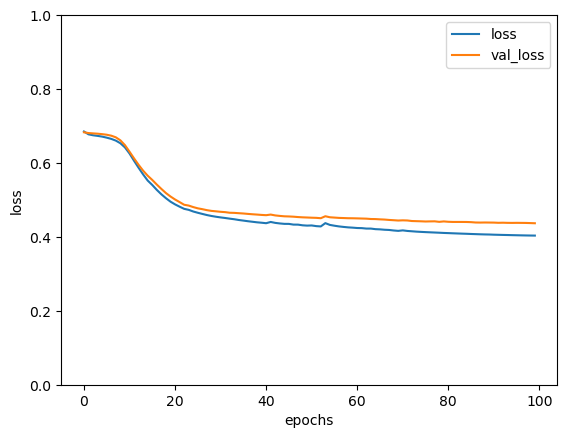

In [68]:
np.random.seed(seed)
random.set_seed(seed)
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.ylim(0,1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [65]:
print("best accuracy :",max(history.history["accuracy"]))

best accuracy : 0.8042905330657959


Epoch 1/100
418/418 [==============================] - 1s 2ms/step - loss: 0.8630 - accuracy: 0.5956 - val_loss: 0.8316 - val_accuracy: 0.6035
Epoch 2/100
418/418 [==============================] - 1s 1ms/step - loss: 0.8044 - accuracy: 0.6254 - val_loss: 0.7899 - val_accuracy: 0.6083
Epoch 3/100
418/418 [==============================] - 1s 1ms/step - loss: 0.7613 - accuracy: 0.6514 - val_loss: 0.7495 - val_accuracy: 0.6424
Epoch 4/100
418/418 [==============================] - 1s 1ms/step - loss: 0.7197 - accuracy: 0.6822 - val_loss: 0.7106 - val_accuracy: 0.6735
Epoch 5/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6821 - accuracy: 0.7041 - val_loss: 0.6801 - val_accuracy: 0.6903
Epoch 6/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6607 - accuracy: 0.7100 - val_loss: 0.6630 - val_accuracy: 0.6956
Epoch 7/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6368 - accuracy: 0.7206 - val_loss: 0.6439 - val_accuracy: 0.7133

Epoch 58/100
418/418 [==============================] - 1s 1ms/step - loss: 0.5155 - accuracy: 0.7716 - val_loss: 0.5353 - val_accuracy: 0.7574
Epoch 59/100
418/418 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.7718 - val_loss: 0.5342 - val_accuracy: 0.7593
Epoch 60/100
418/418 [==============================] - 1s 1ms/step - loss: 0.5141 - accuracy: 0.7724 - val_loss: 0.5339 - val_accuracy: 0.7613
Epoch 61/100
418/418 [==============================] - 1s 1ms/step - loss: 0.5129 - accuracy: 0.7740 - val_loss: 0.5329 - val_accuracy: 0.7603
Epoch 62/100
418/418 [==============================] - 1s 1ms/step - loss: 0.5121 - accuracy: 0.7773 - val_loss: 0.5327 - val_accuracy: 0.7613
Epoch 63/100
418/418 [==============================] - 1s 1ms/step - loss: 0.5111 - accuracy: 0.7782 - val_loss: 0.5323 - val_accuracy: 0.7608
Epoch 64/100
418/418 [==============================] - 1s 1ms/step - loss: 0.5102 - accuracy: 0.7797 - val_loss: 0.5316 - val_accuracy:

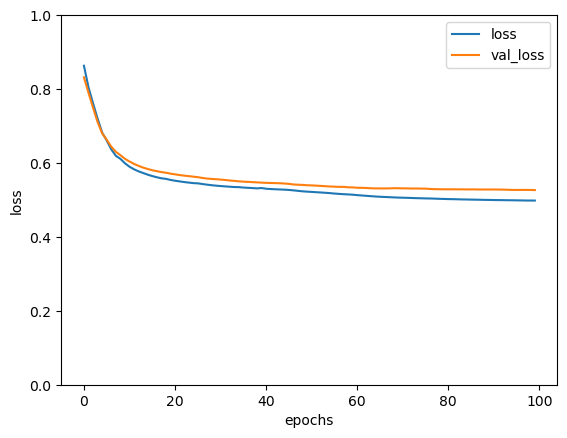

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
np.random.seed(seed)
random.set_seed(seed)
model_2 = Sequential()
model_2.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dense(6, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')
history=model_2.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_test,y_test),shuffle=False)

plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.ylim(0,1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

print("best accuracy :",max(history.history["val_accuracy"]))

Epoch 1/100
418/418 [==============================] - 1s 2ms/step - loss: 1.8501 - accuracy: 0.5641 - val_loss: 1.1284 - val_accuracy: 0.5796
Epoch 2/100
418/418 [==============================] - 1s 2ms/step - loss: 0.8951 - accuracy: 0.5916 - val_loss: 0.7647 - val_accuracy: 0.5796
Epoch 3/100
418/418 [==============================] - 1s 2ms/step - loss: 0.7175 - accuracy: 0.5914 - val_loss: 0.6964 - val_accuracy: 0.5796
Epoch 4/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6841 - accuracy: 0.5914 - val_loss: 0.6836 - val_accuracy: 0.5796
Epoch 5/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6778 - accuracy: 0.5914 - val_loss: 0.6812 - val_accuracy: 0.5796
Epoch 6/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6767 - accuracy: 0.5914 - val_loss: 0.6808 - val_accuracy: 0.5796
Epoch 7/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6764 - accuracy: 0.5914 - val_loss: 0.6807 - val_accuracy: 0.5796

Epoch 58/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6764 - accuracy: 0.5914 - val_loss: 0.6807 - val_accuracy: 0.5796
Epoch 59/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6764 - accuracy: 0.5914 - val_loss: 0.6807 - val_accuracy: 0.5796
Epoch 60/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6764 - accuracy: 0.5914 - val_loss: 0.6807 - val_accuracy: 0.5796
Epoch 61/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6764 - accuracy: 0.5914 - val_loss: 0.6807 - val_accuracy: 0.5796
Epoch 62/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6764 - accuracy: 0.5914 - val_loss: 0.6807 - val_accuracy: 0.5796
Epoch 63/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6764 - accuracy: 0.5914 - val_loss: 0.6807 - val_accuracy: 0.5796
Epoch 64/100
418/418 [==============================] - 1s 1ms/step - loss: 0.6764 - accuracy: 0.5914 - val_loss: 0.6807 - val_accuracy:

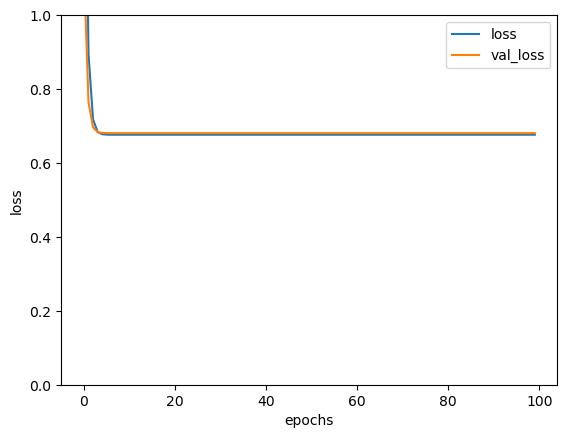

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
np.random.seed(seed)
random.set_seed(seed)
model_3 = Sequential()
model_3.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_regularizer=l2(0.1)))
model_3.add(Dense(6, activation='relu', kernel_regularizer=l2(0.1)))
model_3.add(Dense(4, activation='relu', kernel_regularizer=l2(0.1)))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')
history=model_3.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_test,y_test),shuffle=False)

plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.ylim(0,1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

print("best accuracy :",max(history.history["val_accuracy"]))

Epoch 1/100
418/418 [==============================] - 1s 2ms/step - loss: 0.7959 - accuracy: 0.5536 - val_loss: 0.7841 - val_accuracy: 0.5762
Epoch 2/100
418/418 [==============================] - 1s 1ms/step - loss: 0.7732 - accuracy: 0.5918 - val_loss: 0.7707 - val_accuracy: 0.5815
Epoch 3/100
418/418 [==============================] - 1s 1ms/step - loss: 0.7601 - accuracy: 0.5932 - val_loss: 0.7593 - val_accuracy: 0.5844
Epoch 4/100
418/418 [==============================] - 1s 1ms/step - loss: 0.7479 - accuracy: 0.5935 - val_loss: 0.7478 - val_accuracy: 0.5882
Epoch 5/100
418/418 [==============================] - 1s 1ms/step - loss: 0.7355 - accuracy: 0.6075 - val_loss: 0.7357 - val_accuracy: 0.6016
Epoch 6/100
418/418 [==============================] - 1s 1ms/step - loss: 0.7223 - accuracy: 0.6230 - val_loss: 0.7227 - val_accuracy: 0.6218
Epoch 7/100
418/418 [==============================] - 1s 1ms/step - loss: 0.7078 - accuracy: 0.6405 - val_loss: 0.7083 - val_accuracy: 0.6361

Epoch 58/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4857 - accuracy: 0.7848 - val_loss: 0.5152 - val_accuracy: 0.7704
Epoch 59/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4854 - accuracy: 0.7836 - val_loss: 0.5148 - val_accuracy: 0.7733
Epoch 60/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4849 - accuracy: 0.7838 - val_loss: 0.5146 - val_accuracy: 0.7723
Epoch 61/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4844 - accuracy: 0.7845 - val_loss: 0.5139 - val_accuracy: 0.7723
Epoch 62/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4840 - accuracy: 0.7848 - val_loss: 0.5142 - val_accuracy: 0.7728
Epoch 63/100
418/418 [==============================] - 1s 1ms/step - loss: 0.4835 - accuracy: 0.7854 - val_loss: 0.5141 - val_accuracy: 0.7718
Epoch 64/100
418/418 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.7863 - val_loss: 0.5144 - val_accuracy:

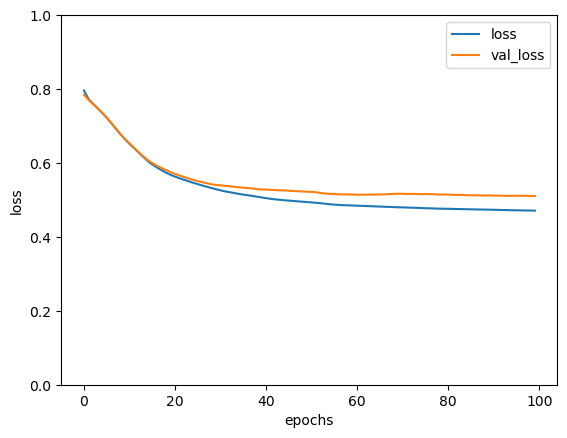

In [86]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
np.random.seed(seed)
random.set_seed(seed)
model_4 = Sequential()
model_4.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_regularizer=l2(0.005)))
model_4.add(Dense(6, activation='relu', kernel_regularizer=l2(0.005)))
model_4.add(Dense(4, activation='relu', kernel_regularizer=l2(0.005)))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')
history=model_4.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_test,y_test),shuffle=False)

plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.ylim(0,1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

print("best accuracy :",max(history.history["val_accuracy"]))

best accuracy : 0.7521572113037109


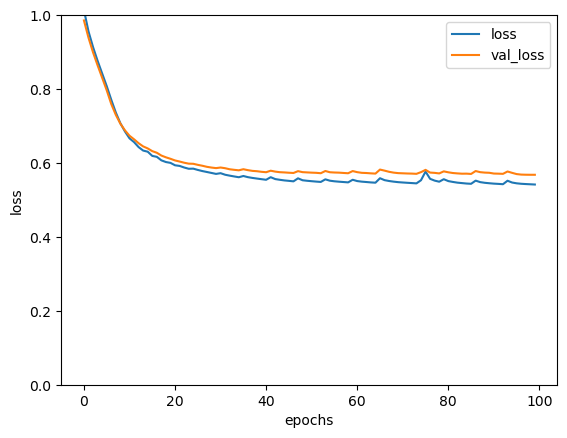

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2
np.random.seed(seed)
random.set_seed(seed)
l1_pa=0.005
l2_pa=0.005
model_5 = Sequential()
model_5.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=l1_pa,l2=l2_pa)))
model_5.add(Dense(6, activation='relu', kernel_regularizer=l1_l2(l1=l1_pa,l2=l2_pa)))
model_5.add(Dense(4, activation='relu', kernel_regularizer=l1_l2(l1=l1_pa,l2=l2_pa)))
model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')
history=model_5.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_test,y_test),verbose=0,shuffle=False)


plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.ylim(0,1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

print("best accuracy :",max(history.history["val_accuracy"]))

# Regularization (Dropout)

In [100]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, activation,Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot  as plt

In [94]:
x = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter05/data/traffic_volume_feats.csv")
y= pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter05/data/traffic_volume_target.csv")

In [95]:
seed=1
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=seed)

In [118]:
np.random.seed(seed)
random.set_seed(seed)

model =Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation ="relu"))
model.add(Dense(10,activation ="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="rmsprop")

history= model.fit(x_train,y_train,epochs=200,batch_size=50,verbose=0,validation_data=(x_test,y_test),shuffle=False)

lowest error on training set= 24.71210289001465
lowest error on test set= 25.423118591308594


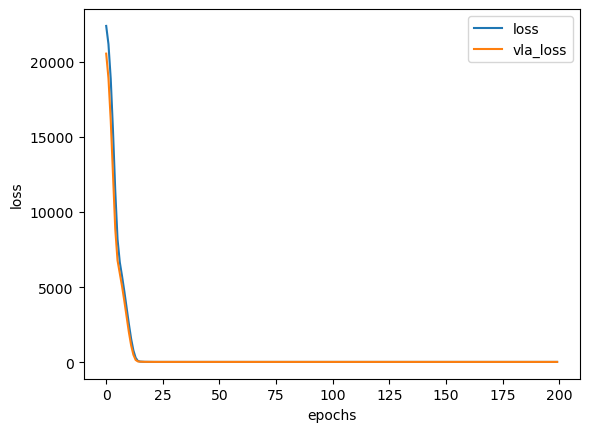

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("loss","vla_loss"))

plt.xlabel("epochs")
plt.ylabel('loss')
print("lowest error on training set=",min(history.history["loss"]))
print("lowest error on test set=",min(history.history["val_loss"]))

Text(0, 0.5, 'loss')

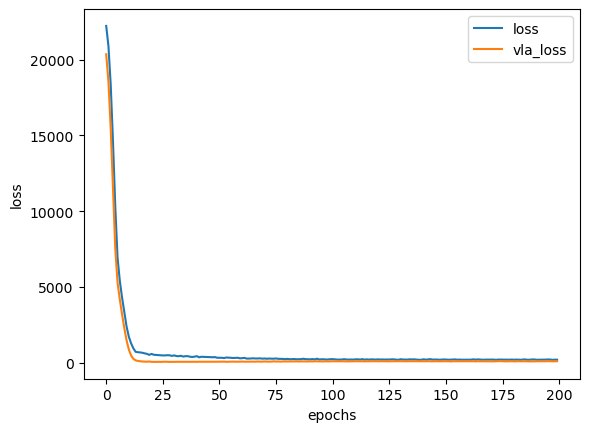

In [122]:
np.random.seed(seed)
random.set_seed(seed)

model_1 =Sequential()
model_1.add(Dense(10,input_dim=x_train.shape[1],activation ="relu"))
model_1.add(Dropout(0.1))
model_1.add(Dense(10,activation ="relu"))
model_1.add(Dense(1))
model_1.compile(loss="mean_squared_error",optimizer="rmsprop")

history_1= model_1.fit(x_train,y_train,epochs=200,batch_size=50,verbose=0,validation_data=(x_test,y_test),shuffle=False)

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.legend(("loss","vla_loss"))
plt.xlabel("epochs")
plt.ylabel('loss')

In [123]:
print("lowest error on training set=",min(history_1.history["loss"]))
print("lowest error on test set=",min(history_1.history["val_loss"]))

lowest error on training set= 177.4919891357422
lowest error on test set= 42.26723861694336


lowest error on training set= 690.9421997070312
lowest error on test set= 59.4410285949707


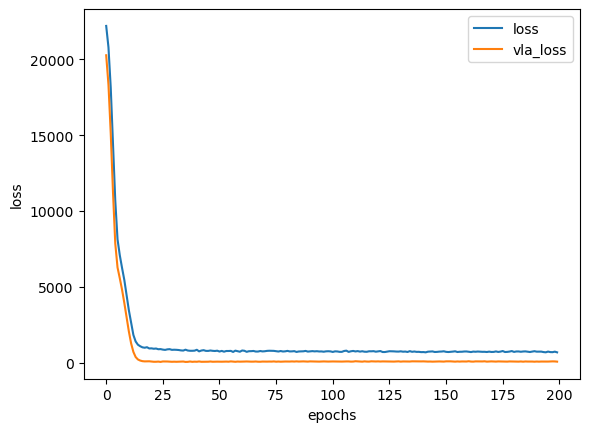

In [124]:
np.random.seed(seed)
random.set_seed(seed)

model_2 =Sequential()
model_2.add(Dense(10,input_dim=x_train.shape[1],activation ="relu"))
model_2.add(Dropout(0.1))
model_2.add(Dense(10,activation ="relu"))
model_2.add(Dropout(0.1))
model_2.add(Dense(1))
model_2.compile(loss="mean_squared_error",optimizer="rmsprop")

history_2= model_2.fit(x_train,y_train,epochs=200,batch_size=50,verbose=0,validation_data=(x_test,y_test),shuffle=False)

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.legend(("loss","vla_loss"))
plt.xlabel("epochs")
plt.ylabel('loss')

print("lowest error on training set=",min(history_2.history["loss"]))
print("lowest error on test set=",min(history_2.history["val_loss"]))

lowest error on training set= 639.26220703125
lowest error on test set= 159.03526306152344


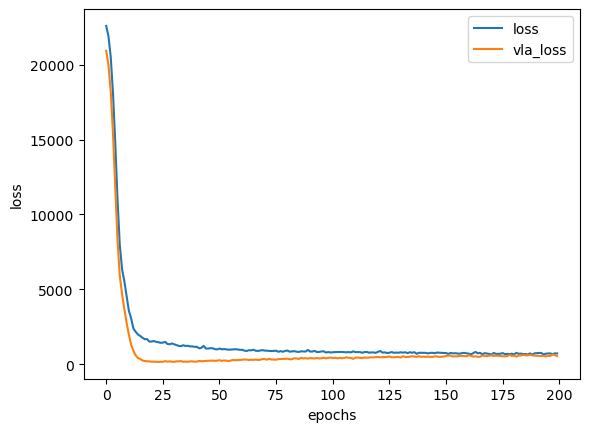

In [126]:
np.random.seed(seed)
random.set_seed(seed)

model_3 =Sequential()
model_3.add(Dense(10,input_dim=x_train.shape[1],activation ="relu"))
model_3.add(Dropout(0.2))
model_3.add(Dense(10,activation ="relu"))
model_3.add(Dropout(0.1))
model_3.add(Dense(1))
model_3.compile(loss="mean_squared_error",optimizer="rmsprop")

history_3= model_3.fit(x_train,y_train,epochs=200,batch_size=50,verbose=0,validation_data=(x_test,y_test),shuffle=False)

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.legend(("loss","vla_loss"))
plt.xlabel("epochs")
plt.ylabel('loss')

print("lowest error on training set=",min(history_3.history["loss"]))
print("lowest error on test set=",min(history_3.history["val_loss"]))

# Regularization (Hyperparameter Tuning)

In [127]:
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [128]:
x =pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter05/data/avila-tr_feats.csv")
y= pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter05/data/avila-tr_target.csv")

In [151]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
def build_model(lambda_parameter):
    model = Sequential()
    model.add(Dense(10, input_dim=x.shape[1], activation='relu', kernel_regularizer=l2(lambda_parameter)))
    model.add(Dense(6, activation='relu', kernel_regularizer=l2(lambda_parameter)))
    model.add(Dense(4, activation='relu', kernel_regularizer=l2(lambda_parameter)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [152]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from tensorflow import random

seed = 1
np.random.seed(seed)
random.set_seed(seed)
model = KerasClassifier(build_fn=build_model, verbose=0)
lambda_parameter = [0.01, 0.5, 1]
epochs = [50, 100]
batch_size = [20]
param_grid = dict(lambda_parameter=lambda_parameter, epochs=epochs, batch_size=batch_size)
grid_seach = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
results_1 = grid_seach.fit(x, y)

C:\Users\97155\AppData\Local\Temp\ipykernel_25644\390064134.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, verbose=0)


In [153]:
print("Best cross validation score=",results_1.best_score_)
print("Parameter Best cross validation error =",results_1.best_params_)
accuracy_means = results_1.cv_results_['mean_test_score']
accuracy_stds = results_1.cv_results_['std_test_score']
parameters = results_1.cv_results_['params']
for p in range(len(parameters)):
    print("Accuracy %f (std %f) for params %r" % (accuracy_means[p], accuracy_stds[p], parameters[p]))

Best cross validation score= 0.7681687474250793
Parameter Best cross validation error = {'batch_size': 20, 'epochs': 100, 'lambda_parameter': 0.01}
Accuracy 0.767306 (std 0.008827) for params {'batch_size': 20, 'epochs': 50, 'lambda_parameter': 0.01}
Accuracy 0.589070 (std 0.008244) for params {'batch_size': 20, 'epochs': 50, 'lambda_parameter': 0.5}
Accuracy 0.589070 (std 0.008244) for params {'batch_size': 20, 'epochs': 50, 'lambda_parameter': 1}
Accuracy 0.768169 (std 0.005529) for params {'batch_size': 20, 'epochs': 100, 'lambda_parameter': 0.01}
Accuracy 0.589070 (std 0.008244) for params {'batch_size': 20, 'epochs': 100, 'lambda_parameter': 0.5}
Accuracy 0.589070 (std 0.008244) for params {'batch_size': 20, 'epochs': 100, 'lambda_parameter': 1}


In [179]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout
def build_model(rate):
    model = Sequential()
    model.add(Dense(10, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [180]:
np.random.seed(seed)
random.set_seed(seed)

model = KerasClassifier(build_fn=build_model, verbose=0)
rate = [0, 0.1, 0.2]
epochs = [50, 100]
batch_size = [20]
param_grid = dict(rate=rate, epochs=epochs, batch_size=batch_size)
grid_seach = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
results_3 = grid_seach.fit(x, y)

C:\Users\97155\AppData\Local\Temp\ipykernel_25644\2113734636.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, verbose=0)


In [182]:
print("Best cross validation score=",results_3.best_score_)
print("Parameter Best cross validation error =",results_3.best_params_)
accuracy_means = results_3.cv_results_['mean_test_score']
accuracy_stds = results_3.cv_results_['std_test_score']
parameters = results_3.cv_results_['params']
for p in range(len(parameters)):
    print("Accuracy %f (std %f) for params %r" % (accuracy_means[p], accuracy_stds[p], parameters[p]))

Best cross validation score= 0.8006711483001709
Parameter Best cross validation error = {'batch_size': 20, 'epochs': 100, 'rate': 0}
Accuracy 0.778044 (std 0.005145) for params {'batch_size': 20, 'epochs': 50, 'rate': 0}
Accuracy 0.770182 (std 0.005529) for params {'batch_size': 20, 'epochs': 50, 'rate': 0.1}
Accuracy 0.739693 (std 0.010074) for params {'batch_size': 20, 'epochs': 50, 'rate': 0.2}
Accuracy 0.800671 (std 0.003731) for params {'batch_size': 20, 'epochs': 100, 'rate': 0}
Accuracy 0.782454 (std 0.007827) for params {'batch_size': 20, 'epochs': 100, 'rate': 0.1}
Accuracy 0.774976 (std 0.006371) for params {'batch_size': 20, 'epochs': 100, 'rate': 0.2}
